# Educación tradicional vs. online en la industria de la tecnología en países hispanos

#### Preguntas posibles relacionadas al tema

- Education lvl vs. dónde aprendió a programar
- Salarios por rango de edad
- Devtype por dónde aprendió a programar
- Salarios según dónde se aprendió a programar
- ¿Si tengo título gano más que si no?
- Qué cargos tienes según dónde estudiaste
- Cuánto tiempo te tomó desde que aprendiste código hasta que programaste profesionalmente? (dónde aprendiste a programar)
- Las personas que aprendieron a programar más jóvenes, ganan más? Qué puesto tienen? (contestar según rangos de edad)


#### Otras preguntas

- Diferencia de salario entre trans y heteros (y si fueron a las universidades)?
- Diferencia de salario entre hombres y mujeres
- Lenguajes de programación aprendidos por tipo de aprendizaje

- Extraer algo para mejorar esto y cerrar la brecha

#### Accionables:
- Cómo disminuir esta brecha de género

#### To-Do
- Dividir el análisis por partes o por preguntas
- Crear una (o varias) función para plotear
- Crear un notebook con el código escondido, que sea solo de reporte y gráficas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from scipy import stats

In [2]:
# Read de data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')
df = pd.read_csv(os.path.join(path, 'survey.csv'))

In [3]:
df

,ResponseId,Age,Gender,Trans,Sexuality,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,MainBranch,Employment,DevType,ConvertedCompYearly,YearsLearnPro
0,12,25-34 years old,Man,No,Straight / Heterosexual,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12.0,5.0,I am a developer by profession,Employed,"Developer, back-end",46482.0,7.0
1,14,Prefer not to say,Other,Prefer not to say,LGBT / Non-hetero,Peru,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",< 10 years,School,10.0,NaN,I am a student who is learning to code,Employed,Data scientist or machine learning specialist,NaN,NaN
2,20,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12.0,9.0,"I used to be a developer by profession, but no...",Employed,Other (please specify):,NaN,3.0
3,46,35-44 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp,22.0,15.0,I am a developer by profession,Employed,"Developer, desktop or enterprise applications;...",60480.0,7.0
4,47,25-34 years old,Man,No,Straight / Heterosexual,Peru,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc)",2.0,NaN,I code primarily as a hobby,I prefer not to say,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,83391,35-44 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",21.0,18.0,I am a developer by profession,Employed,"Developer, front-end;Developer, full-stack;Dev...",27492.0,3.0
6224,83393,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25 - 44 years,School,7.0,5.0,I am a developer by profession,Employed,Data scientist or machine learning specialist;...,68721.0,2.0
6225,83429,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18 - 24 years,School,12.0,7.0,I am a developer by profession,Employed,"Senior Executive (C-Suite, VP, etc.)",41232.0,5.0
6226,83434,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Online Forum;Online Courses or Certification;O...,15.0,11.0,I am a developer by profession,"Independent contractor, freelancer, or self-em...","Developer, mobile;Developer, front-end;Develop...",18326.0,4.0


In [4]:
df.describe()

,ResponseId,YearsCode,YearsCodePro,ConvertedCompYearly,YearsLearnPro
count,6228.000000,6145.000000,5052.000000,4280.000000,5044.000000
mean,41739.947013,12.047681,8.804137,34564.859813,4.714711
std,22865.072390,8.686521,7.477948,27914.455156,3.595237
min,12.000000,0.500000,0.500000,12.000000,0.000000
25%,25050.000000,6.000000,3.000000,15237.000000,2.000000
50%,40559.500000,10.000000,6.000000,27492.000000,4.000000
75%,60776.000000,16.000000,12.000000,45177.250000,6.000000
max,83439.000000,50.000000,50.000000,200000.000000,31.000000


In [5]:
df.columns

Index(['ResponseId', 'Age', 'Gender', 'Trans', 'Sexuality', 'Country',
       'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'MainBranch', 'Employment', 'DevType', 'ConvertedCompYearly',
       'YearsLearnPro'],
      dtype='object')

Los salarios tienen una desviación estándar muy grande, podríamos usar otros estadísticos como la trim mean

In [6]:
stats.trim_mean(df.ConvertedCompYearly.dropna(), 0.2)

28745.302959501558

## EDA

Antes de iniciar a responder preguntas, visualicemos y entendamos la data.

In [7]:
# Set styles
sns.set_theme()
pio.templates.default = 'ggplot2'

Función para gráficas de barras horizontales normalizadas:

In [8]:
def barploth_normalized(data, title='Title', figsize=(9, 5), padding=-30, label=True):

    if data.shape[0] < 30:
        df_plot = data
    else:
        df_plot = data.value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=round(df_plot*100, 1), y=df_plot.index)
    if label:
        ax.bar_label(ax.containers[0], padding=padding, size=11)
    plt.title(title, size=15)
    plt.xlabel('Porcentaje (%)', size=13)
    plt.margins(0.02)
    plt.show()

### Demográficos

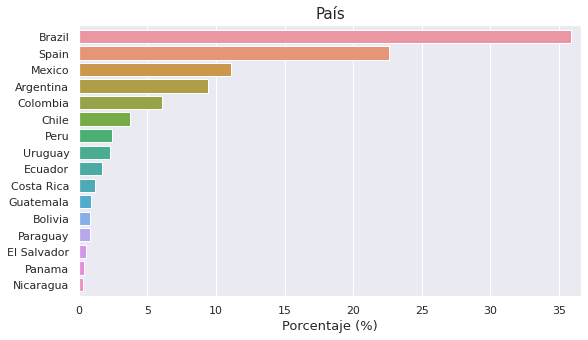

In [9]:
barploth_normalized(data=df.Country, title='País', label=False)

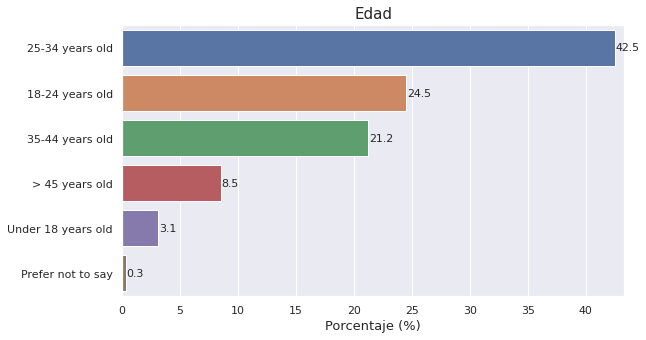

In [10]:
barploth_normalized(df.Age, title='Edad', padding=1)

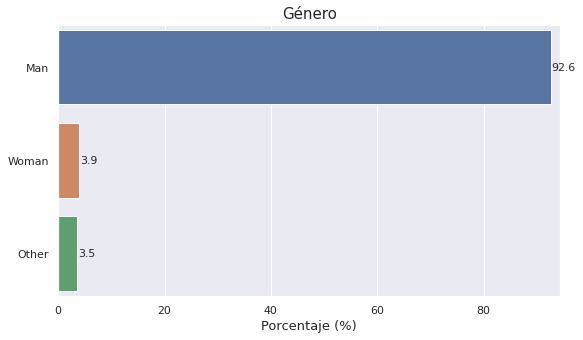

In [11]:
barploth_normalized(df.Gender, title='Género', padding=1)

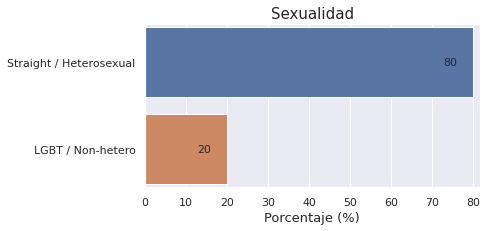

In [12]:
barploth_normalized(df.Sexuality, title='Sexualidad', figsize=(6, 3))

* Las personas encuestadas que se identificaron como hombres son el 80%. Esto muestra una fuerte desigualdad de género.

* De la misma forma, personas que se identifican como no heterosexuales son minoría.

### Educación

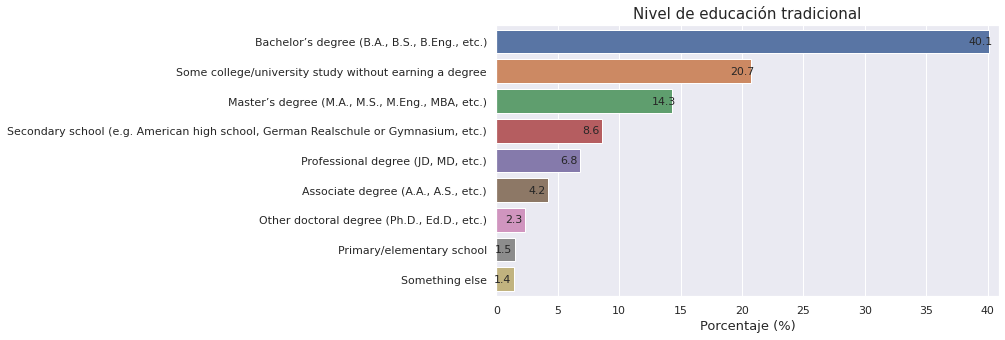

In [13]:
barploth_normalized(df.EdLevel, title='Nivel de educación tradicional', padding=-20)

Se crea un nuevo DataFrame para poder graficar las variables con respuestas múltiples.

In [14]:
# Function for multi-answers columns
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [15]:
total = split_multicolumn(df.LearnCode).sum().sum()
df_learncode = (split_multicolumn(df.LearnCode).sum()/total).sort_values(ascending=False)

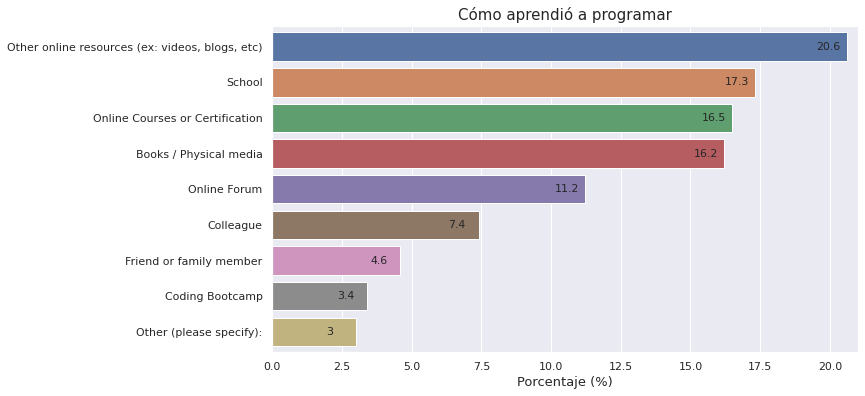

In [16]:
barploth_normalized(df_learncode, title='Cómo aprendió a programar', figsize=(10.5, 6))

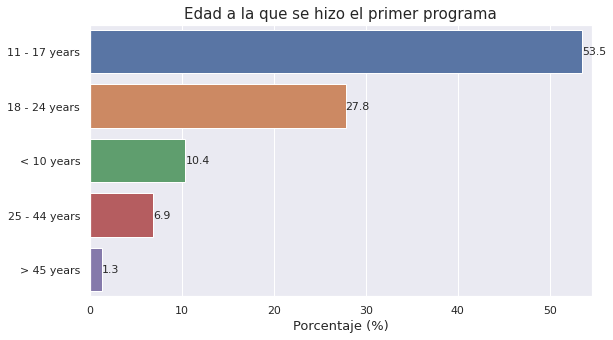

In [17]:
barploth_normalized(df.Age1stCode, title='Edad a la que se hizo el primer programa', padding=0)

* La mayoría tiene estudios superiores. Pero pocas personas dicen haber aprendido en la universidad. Esto sugiere que la mayoría aprendió de forma autodidacta o no tradicional.

* Casi el 90% hizo su primer programa antes de los 24 años.

### Empleo

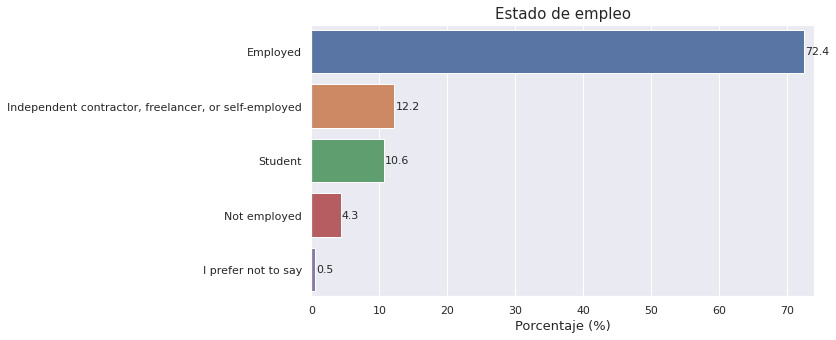

In [18]:
barploth_normalized(df.Employment, title='Estado de empleo', padding=1)

In [19]:
# Yearscode
px.histogram(df, x='YearsLearnPro', marginal='box', title='Años desde que aprendió código hasta ser profesional', nbins=50)

In [20]:
# Mainbranch is a multi-answer column
total_m = split_multicolumn(df.MainBranch).sum().sum()
df_mainbranch = (split_multicolumn(df.MainBranch).sum()/total_m).sort_values(ascending=False)

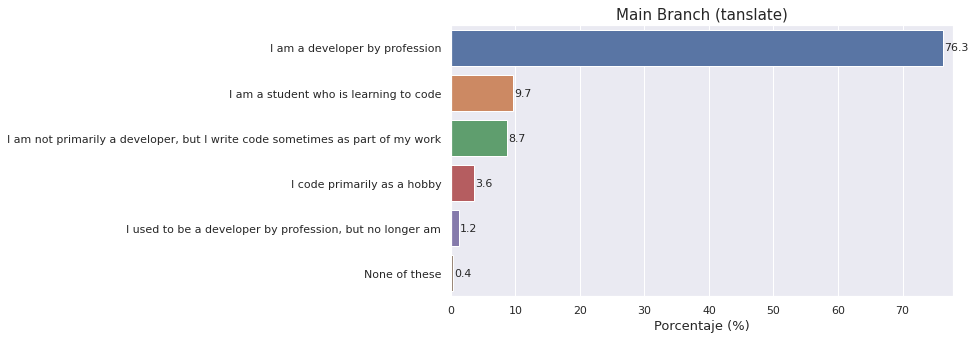

In [21]:
barploth_normalized(df_mainbranch, title='Main Branch (tanslate)', padding=1)

In [22]:
px.histogram(df, x='ConvertedCompYearly', marginal='box', title='Salarios')

### Dev types

In [23]:
# DevType is a multi-answer column
total_d = split_multicolumn(df.DevType).sum().sum()
df_DevType = (split_multicolumn(df.DevType).sum()/total_d).sort_values(ascending=False)

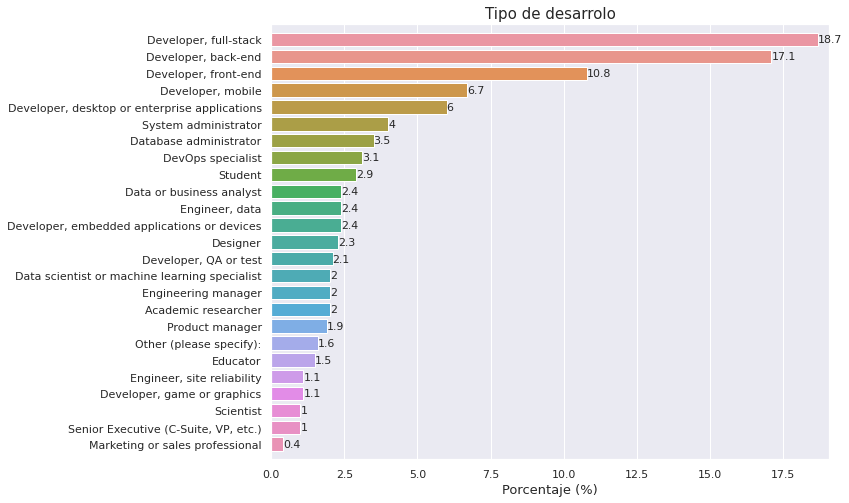

In [24]:
barploth_normalized(df_DevType, title='Tipo de desarrolo', figsize=(10, 8), padding=0)

In [25]:
# Revisar que ya se haya analizado todas las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           6228 non-null   int64  
 1   Age                  6199 non-null   object 
 2   Gender               6228 non-null   object 
 3   Trans                6135 non-null   object 
 4   Sexuality            6228 non-null   object 
 5   Country              6228 non-null   object 
 6   EdLevel              6213 non-null   object 
 7   Age1stCode           6221 non-null   object 
 8   LearnCode            6207 non-null   object 
 9   YearsCode            6145 non-null   float64
 10  YearsCodePro         5052 non-null   float64
 11  MainBranch           6228 non-null   object 
 12  Employment           6226 non-null   object 
 13  DevType              5445 non-null   object 
 14  ConvertedCompYearly  4280 non-null   float64
 15  YearsLearnPro        5044 non-null   f

### Next steps

- Creo que se podría hacer aquí otro procesamiento de data para las preguntas que se vayan a resolver. Tipo agrupaciones o whatever (en caso de ser necesario).
- Resolver las preguntas y generar pruebas de hipótesis en otro Notebook (?) ¿O en este mismo y en otro solo los reportes finales? -> Creo que las hipótesis en otro y el reporte también en otro. Serían 2.
- ¿Se puede hacer correlaciones? -> Sí, hagamos un pairplot. Y una matriz de covarianza.

In [26]:
df.head() #Ya borro esto,no quiero irme muy arriba
# Cool, ya para el final hacemos limpieza, por ahora lo que sea necesario

,ResponseId,Age,Gender,Trans,Sexuality,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,MainBranch,Employment,DevType,ConvertedCompYearly,YearsLearnPro
0,12,25-34 years old,Man,No,Straight / Heterosexual,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12.0,5.0,I am a developer by profession,Employed,"Developer, back-end",46482.0,7.0
1,14,Prefer not to say,Other,Prefer not to say,LGBT / Non-hetero,Peru,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",< 10 years,School,10.0,NaN,I am a student who is learning to code,Employed,Data scientist or machine learning specialist,NaN,NaN
2,20,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12.0,9.0,"I used to be a developer by profession, but no...",Employed,Other (please specify):,NaN,3.0
3,46,35-44 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp,22.0,15.0,I am a developer by profession,Employed,"Developer, desktop or enterprise applications;...",60480.0,7.0
4,47,25-34 years old,Man,No,Straight / Heterosexual,Peru,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc)",2.0,NaN,I code primarily as a hobby,I prefer not to say,NaN,NaN,NaN


In [27]:
df.dtypes

ResponseId               int64
Age                     object
Gender                  object
Trans                   object
Sexuality               object
Country                 object
EdLevel                 object
Age1stCode              object
LearnCode               object
YearsCode              float64
YearsCodePro           float64
MainBranch              object
Employment              object
DevType                 object
ConvertedCompYearly    float64
YearsLearnPro          float64
dtype: object

## Bi and multivariate EDA

### Género y compensación

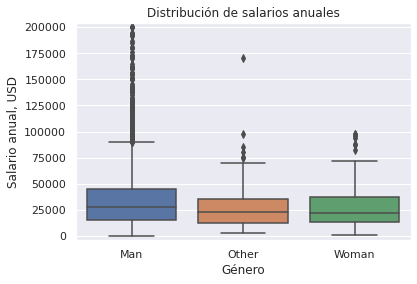

In [28]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Gender", y="ConvertedCompYearly", data=df)
plt.title('Distribución de salarios anuales')
plt.xlabel('Género')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

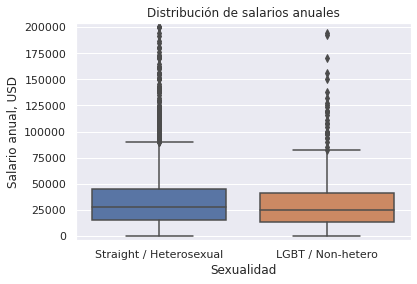

In [29]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Sexuality", y="ConvertedCompYearly", data=df)
plt.title('Distribución de salarios anuales')
plt.xlabel('Sexualidad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

**Ideas**

* Los hombres ganan un poco más según la gráfica. Probémoslo o rechacémoslo con test de hipótesis. Lo mismo para sexualidad.

### Dónde aprendieron y salario

Creo que sí es buena idea comparar la distribución de salarios de universidad y métodos no tradicionales. 

Probablemente toque generar un nuevo dataset para esto, en caso de que sí, acá lo diseñamos y luego lo pasamos al notebook de process

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>